# *infinite-range-hopping Bose-Hubbard model*

$$
\rho = \rho(\beta,\mu) = \frac{\sum_{n=1}^\infty = ne^{\beta[(\mu+\lambda-1)n-\lambda n^{2}]}}{\sum_{n=0}^\infty = e^{\beta[(\mu+\lambda-1)n-\lambda n^{2}]}}
$$

## *Desarrollo*

### Dependencias

In [1]:
import math
import matplotlib.pyplot as plt
import time

### Valores de *µ*

$$
 \rho(\beta,\mu) = \left\{
       \begin{array}{ll}
     0      & \mathrm{si\ \quad} \mu < 1 \\
     K & \mathrm{si\ \quad} 2(K - 1) \Lambda +1 < \mu < 2K \Lambda +1 \\
       \end{array}
     \right.
$$

In [2]:
def rangoK(k, lam):
    limInf = 2*(k-1)*lam+1
    limSup = 2*k*lam+1
    return (limInf, limSup)

\begin{equation}
\sum_{n=1}^\infty = ne^{\beta[(\mu+\Lambda-1)n-\Lambda n^{2}]}
\end{equation}

In [3]:
def f1(b , u , lam, N):
    sumatoria = 0
    for n in range(1, N):
        sumatoria+=n*math.exp(b*((u+lam-1)*n-lam*math.pow(n, 2)))
    return sumatoria

\begin{equation}
\sum_{n=0}^\infty = e^{\beta[(\mu+\Lambda-1)n-\Lambda n^{2}]}
\end{equation}

In [4]:
def f2(b , u , lam, N):
    sumatoria = 0.0
    for n in range(N):
        resul = math.exp(b*((u+lam-1)*n-lam*math.pow(n, 2)))
        sumatoria+= resul
    return sumatoria

### Parámetros formula

In [5]:
B = 2  #Temperatura inversa
U = 0.5
lam =  3
N = 10
K = 0.3 # Entero positivo

### Obtención de *ρ* y *µ*

In [6]:
start_time = time.time() #Para medir el tiempo de ejecución

numero_segmentaciones = 14.0
u = -2
x = []
y = []

for i in range(int(numero_segmentaciones)):
    u += 14/numero_segmentaciones
    try:
        ro =  f1(B, u, lam, N)/f2(B, u, lam, N)
        x.append(u)
        y.append(ro)
    except ZeroDivisionError:
        print('Division por cero')
        break
    except OverflowError:
        print('overflow')
        break
        
print("Magnitud vector x: ",str(len(x)))
print("Magnitud vector y: ",str(len(y)))

print ("Tiempo ejecución: ",time.time() - start_time,"ms")

Magnitud vector x:  14
Magnitud vector y:  14
Tiempo ejecución:  0.007000446319580078 ms


### Graficador

In [7]:
def grafica(x, y, foto = False): 
    if (len(x)!=0 or len(y)!=0):
        plt.plot(x, y, 'b.')
        limInfx=min(x)-1
        limSupx=max(x)+1
        limInfy=min(y)-1
        limSupy=max(y)+1
        plt.axis([limInfx, limSupx, limInfy, limSupy]) #Longitud ejes x,y
        plt.title('ρ vs μ')
        plt.ylabel('ρ')
        plt.xlabel('μ')

        #define plot size in inches (width, height) & resolution(DPI)
        #plt.figure(figsize=(20, 10), dpi=100)
        #plt.figure(figsize=(2,2))
        if foto ==True:
            fig = plt.gcf()
            fig.set_size_inches(18.5, 10.5)
            fig.savefig('test2png.png', dpi=100)
        plt.show()
    else:
        print("Vector vacío")
    

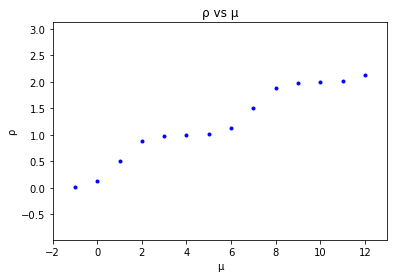

In [8]:
grafica(x, y)

In [9]:
def arreglos_B_XY(B, u, lam, N):
    numero_segmentaciones = 50.0
    u = -10
    x = []
    y = []

    for i in range(int(numero_segmentaciones)):
        u += 30/numero_segmentaciones
        try:
            ro =  f1(B, u, lam, N)/f2(B, u, lam, N)
            x.append(u)
            y.append(ro)
        except ZeroDivisionError:
            print('Division por cero')
            break
        except OverflowError:
            print('overflow')
            break
    return x,y

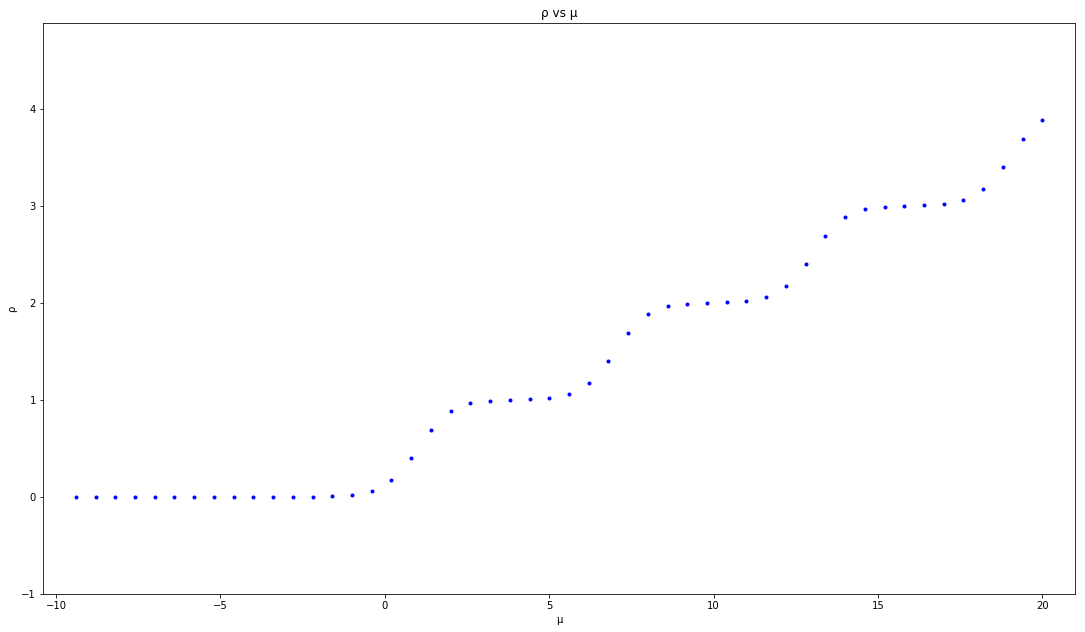

In [10]:
B = 2  #Temperatura inversa
U = 0.5
lam =  3
N = 10
K = 0.3 # Entero positivo

x1, y1 = arreglos_B_XY(2, U, lam, N)
grafica(x1, y1, True)

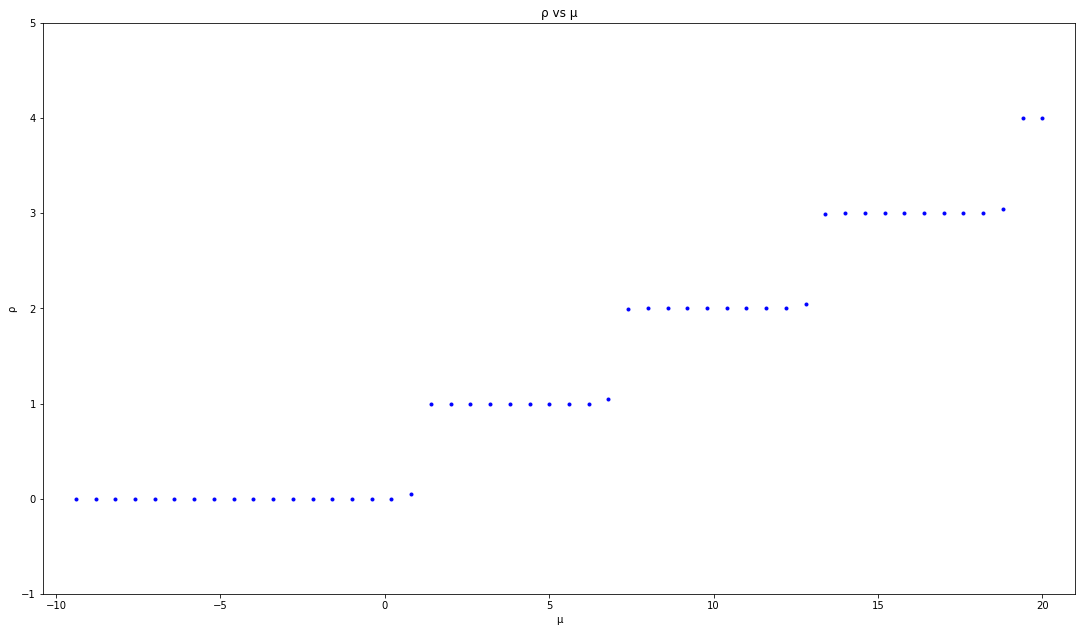

In [11]:
x1, y1 = arreglos_B_XY(15, U, lam, N)
grafica(x1, y1, True)

# Verificador 

$$
\frac{\mu + \lambda - 1}{2 \lambda} 
$$

In [12]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

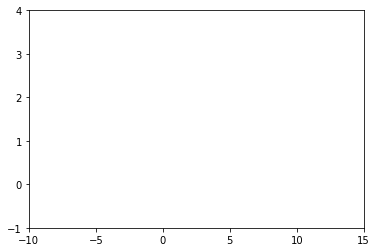

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.

In [13]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

import Problema1
display_animation(Problema1.anim)

In [ ]:
def verificador (U, lam):
    resultado = (U + lam -1)/2*lam
    return resultado